
# 🗓Section 15: Hypothesis A/B Testing

- onl01-dtsc-030220
- 04/10/20



# Topics 
 

- Discuss Hypothesis Testing Workflow: choosing the correct hypothesis test.
    - [CodeAcademy Hypothesis Testing Slideshow](https://drive.google.com/open?id=1p4R2KCErq_iUO-wnfDrGPukTgQDBNoc7)    
    - `hypothesis_testing_workflow_v2-WIP.ipynb`
- Discuss testing assumptions of selected test.
    - What to do when we fail the assumptions?

- Hands-On Hypothesis Testing with Mouse Drinking Data

## QUESTIONS/COMMENTS/INSIGHTS?

- 

## Resources
**Overivews/Cheatsheets**
- [CodeAcademy Hypothesis Testing Slideshow](https://drive.google.com/open?id=1p4R2KCErq_iUO-wnfDrGPukTgQDBNoc7)
- [Cheatsheet: Hypothesis Testing with Scipy](https://drive.google.com/open?id=1EY4UCg20HawWlWa50M2tFauoKBQcFFAW)


- [Choosing Between Parametric and Non-Parametric Tests](https://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

**Trustable Stat References**:
- [Graphpad Prism's Stat Guide](https://www.graphpad.com/guides/prism/8/statistics/index.htm)
- [LAERD Statistics Test Selector](https://statistics.laerd.com/premium/sts/index.php)


## HYPOTHESIS TESTING STEPS

- State the null and alternative hypotheses
- Determine what kind of data/groups you have and select the correct hypothesis test.


| What type of comparison? | Numeric Data | Categorical Data|
| --- | --- | --- |
|Sample vs Known Quantity/Target|1 Sample T-Test| Binomial Test|
|2 Samples | 2 Sample T-Test| Chi-Square|
|More than 2| ANOVA and/or Tukey | Chi Square|



- Separate data in group vars.
- Visualize data and calculate group n (size)
- Remove any outliers (based on groups, not full column)
- Test the assumptions of the hypothesis test you selected. 

- For t-tests & ANOVAs: test for the assumptions of normality and homogeneity of variance.

    1. Check if sample sizes allow us to ignore assumptions, and if not:
    2. **Test Assumption Normality**
        - D'Agostino-Pearson's normality test<br>
        ```scipy.stats.normaltest```
        - Shapiro-Wilik Test<br>
        ```scipy.stats.shapiro```<br>
    3. **Test for Homogeneity of Variance**

     - Levene's Test<br>
    ```scipy.stats.levene```

    4. **Choose appropriate test based upon the above** 
        * Select the appropriate test based on type of comparison being made, the number of groups, the type of data.
        - Select the non-parametric equivalent of your test if you fail the assumptions from the table 


| Parametric tests (means) | Nonparametric tests (medians) |
 | --- | --- |
 | 1-sample t test | 1-sample Wilcoxon |
 | 2-sample t test | Mann-Whitney U test |
 | One-Way ANOVA | Kruskal-Wallis |

# Statistical Tests Summary Table

| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | **1-sample t test** |`scipy.stats.ttest_1samp()`|  **1-sample Wilcoxon** |`scipy.stats.wilcoxon`|
 | **2-sample t test** |`scipy.stats.ttest_ind()` | **Mann-Whitney U test** |`scipy.stats.mannwhitneyu()` |
 | **One-Way ANOVA** | `scipy.stats.f_oneway()` | **Kruskal-Wallis** | `scipy.stats.kruskal` | 
| **Two-Way ANOVA** | `statsmodels.stats.formula.api.ols` + `statsmodels.stats.anova.anova_lm`
    
* **Perform chosen statistical test, calculate effect size, and any post-hoc tests.**
    - To perform post-hoc pairwise comparison testing
    - Effect size calculation
        - Cohen's d

<!---

| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
 | One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
 | Factorial DOE with one factor and one blocking variable |Friedman test  | --->


# Hypothesis Testing: Mouse Data

In [9]:
from IPython.display import HTML
HTML('<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')

#  **Stating our Hypothesis:**

> **What question are you attempting to answer?**


- $H_1$ : 

- $H_0$ :

<br>

## Hypothesis

> Question: does stimulation of CRF Neurons in the central amygdala increase alcohol consumption?

- Metric: licks for alcohol
- Two groups: Control and Experimental (ChR2)


- $H_1$: There is a significant difference in average licks for alcohol between control and experimental/stimulated mice across phases.

- $H_0$: There is no significant difference in licks for alcohol between control and experimental/stimulated mice across phases.

$\alpha$=0.05

### Step 1: which type of test?

- What type of data?
    - Numerical
- How many groups?
    - 2 groups
    - 4 phases
- We have 2 different categorical variables and continuous numerical so we are going a two-way ANOVA


## Obtaining/Preprocessing Data

In [10]:
!pip install -U fsds_100719
from fsds_100719.imports import *
dp.clear_output()

pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)
plt.style.use('seaborn-notebook')

In [2]:
df = pd.read_csv('datasets/neuro_drinking_data.csv')
df = df.drop(columns=['Batch'])
df.head()

,Mouse ID,Group,Sex,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1,R2,R3,R4,R5,R6,R7,R8
0,Con 4,Control,F,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,Con 5,Control,F,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,Con 6,Control,F,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,CON 2.1,Control,M,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,ChR2 2.2,ChR2,F,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759


### Preprocessing Data

#### Laying Out Our Approach

0. Rename mouse IDs and Groups (ChR2 -> Experimental)
1. Make a **dict/lists of the column names** that should be **averaged together** (`col_dict`) based on phase of the experiment (BL,S,PS,R)
    - Make inverse dict with key=Day, Value=Phase
2. Make a new df of means using `col_dict`
3. Melt the dataframe with `pd.melt` to turn the day-columns into rows. 
    - Visualize the data
4. Prepare data for testing assumptions
    - Make a grp dict using  `df.groupby('Group').groups` 

5. Remove Outliers
6. Test Normality
7. Test Equal Variance
8. Select  correct test
9. Perform hypothesis test
10. Perform post-hoc tests

<!---
**Variables:**

- `col_dict` (dict): dict of column names to be grouped together for means
- `df_means` (df): df of col_dict column means.
- `grps` (dict): groupby dict where keys = 'Group' column and values = row indices

- `data` (dict): Dictionary of...
    - Series of each phase by group? --->

In [11]:
## Make New Mouse IDs
mouse_ids = list(df['Mouse ID'].unique())
mouse_ids

['Con 4',
 'Con 5',
 'Con 6',
 'CON 2.1',
 'ChR2 2.2',
 'ChR2 2.4',
 'DID CeA 3.1',
 'DID CeA 3.2',
 'DID CeA 3.3',
 'DID CeA 3.4',
 'DID CeA 3.5?',
 'DID CeA 3.6',
 'DID CeA 3.7',
 'DID CeA 3.8',
 'DID CeA 3.9',
 'CeA-DID 4.1',
 'CeA-DID 4.2',
 'CeA-DID 4.3',
 'CeA-DID 4.4',
 'CeA-DID 4.5',
 'CeA-DID 4.6',
 'CeA-DID 4.8']

In [14]:
## Replace old mouse IDs
new_ids = [f"Mouse{i}" for i in range(1,len(mouse_ids)+1)]
new_ids

['Mouse1',
 'Mouse2',
 'Mouse3',
 'Mouse4',
 'Mouse5',
 'Mouse6',
 'Mouse7',
 'Mouse8',
 'Mouse9',
 'Mouse10',
 'Mouse11',
 'Mouse12',
 'Mouse13',
 'Mouse14',
 'Mouse15',
 'Mouse16',
 'Mouse17',
 'Mouse18',
 'Mouse19',
 'Mouse20',
 'Mouse21',
 'Mouse22']

In [15]:
id_map = dict(zip(mouse_ids, new_ids))
id_map

{'Con 4': 'Mouse1',
 'Con 5': 'Mouse2',
 'Con 6': 'Mouse3',
 'CON 2.1': 'Mouse4',
 'ChR2 2.2': 'Mouse5',
 'ChR2 2.4': 'Mouse6',
 'DID CeA 3.1': 'Mouse7',
 'DID CeA 3.2': 'Mouse8',
 'DID CeA 3.3': 'Mouse9',
 'DID CeA 3.4': 'Mouse10',
 'DID CeA 3.5?': 'Mouse11',
 'DID CeA 3.6': 'Mouse12',
 'DID CeA 3.7': 'Mouse13',
 'DID CeA 3.8': 'Mouse14',
 'DID CeA 3.9': 'Mouse15',
 'CeA-DID 4.1': 'Mouse16',
 'CeA-DID 4.2': 'Mouse17',
 'CeA-DID 4.3': 'Mouse18',
 'CeA-DID 4.4': 'Mouse19',
 'CeA-DID 4.5': 'Mouse20',
 'CeA-DID 4.6': 'Mouse21',
 'CeA-DID 4.8': 'Mouse22'}

In [16]:
df['Mouse ID'] = df['Mouse ID'].map(id_map)
df['Mouse ID'].unique()

array(['Mouse1', 'Mouse2', 'Mouse3', 'Mouse4', 'Mouse5', 'Mouse6',
       'Mouse7', 'Mouse8', 'Mouse9', 'Mouse10', 'Mouse11', 'Mouse12',
       'Mouse13', 'Mouse14', 'Mouse15', 'Mouse16', 'Mouse17', 'Mouse18',
       'Mouse19', 'Mouse20', 'Mouse21', 'Mouse22'], dtype=object)

In [18]:
## Rename groups (ChR2)
group_map = {'ChR2':'Experimental'}
df['Group'] = df['Group'].replace(group_map)
df.head()

,Mouse ID,Group,Sex,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1,R2,R3,R4,R5,R6,R7,R8
0,Mouse1,Control,F,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,Mouse2,Control,F,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,Mouse3,Control,F,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,Mouse4,Control,M,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,Mouse5,Experimental,F,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759


In [35]:
## Get a dict of which cols belong to which phase
col_dict= {}

phases = ['BL','S','PS','R']
for phase in phases:
    columns = df.drop('Sex',axis=1).columns
    col_dict[phase] = [col for col in columns if phase in col]
col_dict

{'BL': ['BL1', 'BL2', 'BL3', 'BL4'],
 'S': ['S1', 'S2', 'S3', 'S4', 'PS1', 'PS2', 'PS3', 'PS4'],
 'PS': ['PS1', 'PS2', 'PS3', 'PS4'],
 'R': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']}

In [36]:
## Make the inverse of col_dict (Key=Day, Value=Phase)
phase_dict = {}
for phase, colnames in col_dict.items():
    for col in colnames:
        phase_dict[col] = phase 
phase_dict

{'BL1': 'BL',
 'BL2': 'BL',
 'BL3': 'BL',
 'BL4': 'BL',
 'S1': 'S',
 'S2': 'S',
 'S3': 'S',
 'S4': 'S',
 'PS1': 'PS',
 'PS2': 'PS',
 'PS3': 'PS',
 'PS4': 'PS',
 'R1': 'R',
 'R2': 'R',
 'R3': 'R',
 'R4': 'R',
 'R5': 'R',
 'R6': 'R',
 'R7': 'R',
 'R8': 'R'}

### Getting Group Data For EDA & Testing

In [37]:
df.head()

,Mouse ID,Group,Sex,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1,R2,R3,R4,R5,R6,R7,R8
0,Mouse1,Control,F,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,Mouse2,Control,F,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,Mouse3,Control,F,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,Mouse4,Control,M,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,Mouse5,Experimental,F,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759


In [40]:
id_cols = ['Mouse ID','Group']
drop_cols = [*id_cols,'Sex']
drop_cols


['Mouse ID', 'Group', 'Sex']

In [42]:
## Melt dataframe so the days become rows
# id_cols = ['Mouse ID','Group']
var_cols = df.drop(columns=drop_cols).columns
var_cols

Index(['BL1', 'BL2', 'BL3', 'BL4', 'S1', 'S2', 'S3', 'S4', 'PS1', 'PS2', 'PS3',
       'PS4', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'],
      dtype='object')

In [43]:
df2 = df.melt(id_cols,value_vars=var_cols,var_name='Day',value_name='Licks')
df2

,Mouse ID,Group,Day,Licks
0,Mouse1,Control,BL1,665
1,Mouse2,Control,BL1,859
2,Mouse3,Control,BL1,589
3,Mouse4,Control,BL1,939
4,Mouse5,Experimental,BL1,710
...,...,...,...,...
435,Mouse18,Experimental,R8,880
436,Mouse19,Experimental,R8,1047
437,Mouse20,Experimental,R8,293
438,Mouse21,Experimental,R8,900


In [44]:
phase_dict


{'BL1': 'BL',
 'BL2': 'BL',
 'BL3': 'BL',
 'BL4': 'BL',
 'S1': 'S',
 'S2': 'S',
 'S3': 'S',
 'S4': 'S',
 'PS1': 'PS',
 'PS2': 'PS',
 'PS3': 'PS',
 'PS4': 'PS',
 'R1': 'R',
 'R2': 'R',
 'R3': 'R',
 'R4': 'R',
 'R5': 'R',
 'R6': 'R',
 'R7': 'R',
 'R8': 'R'}

In [45]:
## Make a Phase columns that uses phase dict mapped onto "Day"
df2['Phase'] = df2['Day'].map(phase_dict)
df2

,Mouse ID,Group,Day,Licks,Phase
0,Mouse1,Control,BL1,665,BL
1,Mouse2,Control,BL1,859,BL
2,Mouse3,Control,BL1,589,BL
3,Mouse4,Control,BL1,939,BL
4,Mouse5,Experimental,BL1,710,BL
...,...,...,...,...,...
435,Mouse18,Experimental,R8,880,R
436,Mouse19,Experimental,R8,1047,R
437,Mouse20,Experimental,R8,293,R
438,Mouse21,Experimental,R8,900,R


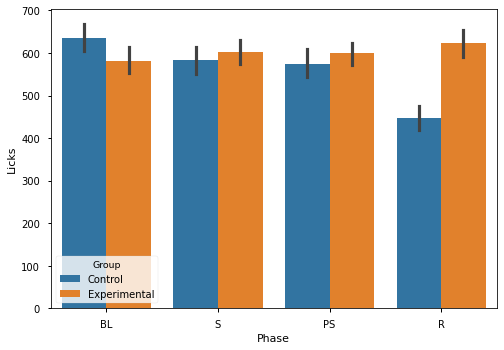

In [48]:
## Visualize Bar Plot
sns.barplot(data=df2, x='Phase',y='Licks',hue='Group',ci=68)

In [49]:
## Separate Groups into variables/dict
grps = df2.groupby('Group').groups
grps

{'Control': Int64Index([  0,   1,   2,   3,  11,  12,  13,  14,  21,  22,
             ...
             417, 418, 419, 420, 421, 429, 430, 431, 432, 439],
            dtype='int64', length=180),
 'Experimental': Int64Index([  4,   5,   6,   7,   8,   9,  10,  15,  16,  17,
             ...
             425, 426, 427, 428, 433, 434, 435, 436, 437, 438],
            dtype='int64', length=260)}

In [56]:
# Get groups based on 'Group' column

## Loop through grps dict 
for grp_name in grps:
    
    ## Initialize the group's dict entry as empty df
    grps[grp_name] = {}
    
    ## Use groupby + get_group & slice out columns of interest
    grp_df = df2.groupby("Group").get_group(grp_name)[['Phase','Day','Licks']]
    
    ## Make each phase's data a nested dict entry
    for phase in phases:
        grps[grp_name][phase] = grp_df.groupby('Phase').get_group(phase)
print(grps.keys()) 
print(grps['Control'].keys())

dict_keys(['Control', 'Experimental'])
dict_keys(['BL', 'S', 'PS', 'R'])


In [65]:
## Examine contents of nested dicts
test = grps['Experimental']['S'][['Licks']]
test

,Licks
92,620
93,591
94,882
95,546
96,759
97,1106
98,820
103,492
104,505
105,646


In [75]:
## REMOVE OUTLIERS
from scipy import stats
## Use z-scores to remove outliers 
z_scores = np.abs(stats.zscore(test))
# Optional (if time): Make into a function
idx_outs = z_scores >3
print(idx_outs.sum())

# test[~idx_outs]

0


In [79]:
cleaned_data = test[~idx_outs]

def remove_outliers(data):
    """Returns a t/f index of outliers from the dataset using Z-score>3 as cuttoff"""
    ## Use z-scores to remove outliers 
    z_scores = np.abs(stats.zscore(data))
    # Optional (if time): Make into a function
    idx_outs = z_scores >3
    return idx_outs
idx = remove_outliers(test)
test[~idx]

,Licks
92,620
93,591
94,882
95,546
96,759
97,1106
98,820
103,492
104,505
105,646


In [83]:
## Create a new dict to fill with outlier-removed data
clean_data = {}

## Loop through grps.items()
for grp_name, grp_data in grps.items():
    
    ## initialize empty grp in dict
    clean_data[grp_name] = {}
    ## Loop through the nested dict to to pull out data 
    for phase, df_data in grp_data.items():
        data = df_data['Licks']
#         display(data)
        ## Remove outliers 
        idx_outs = remove_outliers(data)

        ## Fill in clean data
        clean_data[grp_name][phase] = data[~idx_outs]
print(clean_data.keys())
print(clean_data['Control'].keys())

dict_keys(['Control', 'Experimental'])
dict_keys(['BL', 'S', 'PS', 'R'])


<module 'scipy.stats' from '//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/__init__.py'>

In [88]:
## Test Assumption of Normality
## Make empty list with headers for results
res = [['Group','Phase','N','Test','Stat','p','sig']]

## Loop through clean_data.items()

## Loop through clean_data.items()
for grp, grp_data in clean_data.items():    
    ## Loop through the nested dict to to pull out data 
    for phase, licks in grp_data.items():
        ## Loop through the nested dict to to pull out data 
        stat, p = stats.normaltest(licks)
        res.append([grp,phase, len(licks),'Normality',stat, p, p<.05])
        
df_res = pd.DataFrame(res[1:],columns=res[0])
df_res
        
 


,Group,Phase,N,Test,Stat,p,sig
0,Control,BL,36,Normality,4.186,0.123,False
1,Control,S,36,Normality,1.012,0.603,False
2,Control,PS,36,Normality,1.708,0.426,False
3,Control,R,72,Normality,1.055,0.590,False
4,Experimental,BL,51,Normality,0.018,0.991,False
5,Experimental,S,52,Normality,6.349,0.042,True
6,Experimental,PS,52,Normality,0.993,0.609,False
7,Experimental,R,103,Normality,4.190,0.123,False


### Did we pass assumption of normality?

- 

In [89]:
## Test for Homo of Variance
# - Hmmm, for two way ANOVA, this ones a bit tricky
stats.levene()

### Hypothesis Test

In [91]:
## HYPOTHESIS TEST - 2 way anova with statsmodels
import statsmodels.api as sm
import statsmodels.stats as sts
from statsmodels.formula.api import ols

In [94]:
## Make statsmodels formula ols model (including an interaction term)
formula = "Licks~C(Group)*C(Phase)"
model = ols(formula,df2).fit()
## Run anova_lm on model
results = sts.anova.anova_lm(model)
results


,df,sum_sq,mean_sq,F,PR(>F)
C(Group),1.0,4.951e+05,495125.882,8.52,0.004
C(Phase),3.0,2.179e+05,72621.048,1.25,0.291
C(Group):C(Phase),3.0,8.874e+05,295784.389,5.09,0.002
Residual,432.0,2.510e+07,58111.036,NaN,NaN


### Remake clean dataframe for post-hoc pairwise comparisons
- Let's figure it out together (hopefully!)
- Worst case scenario: compare a single groups phases

In [96]:
def prep_data_for_tukeys(data):
    """Accepts a dictionary with group names as the keys 
    and pandas series as the values. 

    Returns a dataframe ready for tukeys test:
    - with a 'data' column and a 'group' column for sms.stats.multicomp.pairwise_tukeyhsd 

    Example Use:
    df_tukey = prep_data_for_tukeys(grp_data)
    tukey = sms.stats.multicomp.pairwise_tukeyhsd(df_tukey['data'], df_tukey['group'])
    tukey.summary()
    """

    df_tukey = pd.DataFrame(columns=['data','group'])
    for k,v in  data.items():
        grp_df = v.rename('data').to_frame() 
        grp_df['group'] = k
        df_tukey=pd.concat([df_tukey, grp_df],axis=0)

    ## New lines added to ensure compatibility with tukey's test
    df_tukey['group'] = df_tukey['group'].astype('str')
    df_tukey['data'] = df_tukey['data'].astype('float')
    return df_tukey

In [98]:
df_tukeys = prep_data_for_tukeys(clean_data['Control'])
df_tukeys

,data,group
0,665.0,BL
1,859.0,BL
2,589.0,BL
3,939.0,BL
11,494.0,BL
...,...,...
429,537.0,R
430,364.0,R
431,716.0,R
432,696.0,R


In [99]:
result= sts.multicomp.pairwise_tukeyhsd(df_tukeys['data'],df_tukeys['group'])
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BL,PS,-59.8889,0.6169,-190.1595,70.3817,False
BL,R,-186.8333,0.001,-299.651,-74.0157,True
BL,S,-52.0556,0.7041,-182.3261,78.215,False
PS,R,-126.9444,0.0206,-239.7621,-14.1268,True
PS,S,7.8333,0.9,-122.4372,138.1039,False
R,S,134.7778,0.012,21.9602,247.5954,True


In [100]:
df_tukeys = prep_data_for_tukeys(clean_data['Experimental'])
result= sts.multicomp.pairwise_tukeyhsd(df_tukeys['data'],df_tukeys['group'])
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BL,PS,30.3318,0.9,-95.8082,156.4718,False
BL,R,43.7889,0.7057,-65.8028,153.3806,False
BL,S,34.0818,0.8931,-92.0582,160.2218,False
PS,R,13.4571,0.9,-95.4276,122.3417,False
PS,S,3.75,0.9,-121.7762,129.2762,False
R,S,-9.7071,0.9,-118.5917,99.1776,False


# APPENDIX

In [33]:
# def Cohen_d(group1, group2):
#     """
#     Compute Cohen's d.
    
#     Args:
#         group1: Series or NumPy array
#         group2: Series or NumPy array

#     Returns:
#         d (float): effect size statistic

#     Interpretation:
#     > Small effect = 0.2
#     > Medium Effect = 0.5
#     > Large Effect = 0.8
#     """
#     diff = group1.mean() - group2.mean()

#     n1, n2 = len(group1), len(group2)
#     var1 = group1.var()
#     var2 = group2.var()

#     # Calculate the pooled threshold as shown earlier
#     pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
#     # Calculate Cohen's d statistic
#     d = diff / np.sqrt(pooled_var)
    
#     return d

(https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)